In [2]:
%pip install pyLDAvis
%pip install --user -U nltk
%pip install -U spacy
%pip install seaborn
%pip install pandas

  Using cached scipy-1.13.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached gensim-4.3.2-cp311-cp311-win_amd64.whl.metadata (8.5 kB)
Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl (11.6 MB)
Using cached scipy-1.13.0-cp311-cp311-win_amd64.whl (46.2 MB)
Using cached gensim-4.3.2-cp311-cp311-win_amd64.whl (24.0 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:

import numpy as np
import json
import glob
import nltk
import pandas as pd #to work with csv files

# pd.__version__ = 2.0.0
print(pd.__version__)

#Gensim

# from gensim.corpora import corpora
# from gensim.utils import simple_preprocess


# import gensim
# import gensim.corpora as corpora
# from gensim.utils import simple_preprocess
# from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

2.2.2


In [3]:

data = pd.read_csv(r'C:\Users\Owner\Desktop\surveyResults\RobloxSurvey\Results.csv')
data1= data [['Q132', 'Q135', 'Q138', 'Q124']]
data1.columns


Index(['Q132', 'Q135', 'Q138', 'Q124'], dtype='object')

In [9]:
responses= data1['Q124'].value_counts

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt
print(data1.shape)
data1= data1[2:]
data1.head()

(114, 4)


,Q132,Q135,Q138,Q124
2,NaN,NaN,NaN,NaN
3,NaN,NaN,Somewhat disagree,Somewhat agree
4,Agree,Somewhat agree,NaN,NaN
5,Strongly disagree,Strongly disagree,NaN,NaN
6,Strongly agree,Strongly agree,NaN,NaN


In [11]:
print(data1["Q132"].unique())

[nan 'Agree' 'Strongly disagree' 'Strongly agree' 'Disagree'
 'Somewhat agree' 'Somewhat disagree' 'Neither agree nor disagree']


['Agree' 'Strongly disagree' 'Strongly agree' nan 'Disagree'
 'Somewhat agree' 'Somewhat disagree' 'Neither agree nor disagree']

In [12]:
# sns.barplot(data=data1)
# plt.show()
from collections import Counter
# size().unstack().plot.bar(stacked=True)

def own_groupby(data, column_name):
    key = Counter(data[column_name]).keys()
    value = Counter(data[column_name]).values()

    return [value for value in zip(key, value)]


In [13]:

results_q132 = own_groupby(data1, "Q132")
results_q135 = own_groupby(data1, "Q135")
results_q138 = own_groupby(data1, "Q138")
results_q124 = own_groupby(data1, "Q124")


In [14]:
print(results_q132[:])

[(nan, 63), ('Agree', 18), ('Strongly disagree', 2), ('Strongly agree', 7), ('Disagree', 4), ('Somewhat agree', 8), ('Somewhat disagree', 3), ('Neither agree nor disagree', 7)]


In [15]:
df = pd.DataFrame(results_q132, columns =['Responses', 'Q132'])


df1 = pd.DataFrame(results_q135, columns =['Responses', 'Q135'])
df2 = pd.DataFrame(results_q138, columns =['Responses', 'Q138'])
df3 = pd.DataFrame(results_q124, columns =['Responses', 'Q124'])
df = df.merge(df1, how='right')
df = df.merge(df2, how='right')
df = df.merge(df3, how='right')

df






,Responses,Q132,Q135,Q138,Q124
0,NaN,63,63,63,63
1,Somewhat agree,8,7,11,11
2,Agree,18,14,10,15
3,Somewhat disagree,3,8,5,7
4,Strongly disagree,2,4,6,3
5,Disagree,4,5,9,6
6,Strongly agree,7,5,1,5
7,Neither agree nor disagree,7,6,7,2


In [16]:
empty = df.iloc[0].values.tolist()
empty.pop(0)

s_agree= df.iloc[1].values.tolist()
s_agree.pop(0)

ag = df.iloc[2].values.tolist()
ag.pop(0)

s_disagree = df.iloc[3].values.tolist()
s_disagree.pop(0)

st_disagree = df.iloc[4].values.tolist()
st_disagree.pop(0)

dis = df.iloc[5].values.tolist()
dis.pop(0)

st_agree = df.iloc[6].values.tolist()
st_agree.pop(0)

neither = df.iloc[7].values.tolist()
neither.pop(0)


'Neither agree nor disagree'

In [17]:
melted_df = df.melt(id_vars=['Responses'], var_name='Questions', value_name='Values')
melted_df

,Responses,Questions,Values
0,NaN,Q132,63
1,Somewhat agree,Q132,8
2,Agree,Q132,18
3,Somewhat disagree,Q132,3
4,Strongly disagree,Q132,2
5,Disagree,Q132,4
6,Strongly agree,Q132,7
7,Neither agree nor disagree,Q132,7
8,NaN,Q135,63
9,Somewhat agree,Q135,7


In [18]:
df4= pd.DataFrame(columns= df['Responses'], index= ['Q132', 'Q138', 'Q124', 'Q135'])
df4['NaN']=empty
df4['Somewhat agree']=s_agree
df4['Agree']=ag
df4['Somewhat disagree']=s_disagree
df4['Strongly disagree']=st_disagree
df4['Disagree']=dis
df4['Strongly agree']=st_agree
df4['Neither agree nor disagree']=neither
df4.drop('NaN', axis=1)
df4= df4[['Somewhat agree','Agree', 'Somewhat disagree', 'Strongly disagree', 'Disagree', 'Strongly agree', 'Neither agree nor disagree']]

df4

Responses,Somewhat agree,Agree,Somewhat disagree,Strongly disagree,Disagree,Strongly agree,Neither agree nor disagree
Q132,8,18,3,2,4,7,7
Q138,7,14,8,4,5,5,6
Q124,11,10,5,6,9,1,7
Q135,11,15,7,3,6,5,2


In [19]:
print(df4.columns)

Index(['Somewhat agree', 'Agree', 'Somewhat disagree', 'Strongly disagree',
       'Disagree', 'Strongly agree', 'Neither agree nor disagree'],
      dtype='object', name='Responses')


Responses  Somewhat agree      Agree  Somewhat disagree  Strongly disagree  \
Q132            16.326531  36.734694           6.122449           4.081633   
Q138            14.285714  28.571429          16.326531           8.163265   
Q124            22.448980  20.408163          10.204082          12.244898   
Q135            22.448980  30.612245          14.285714           6.122449   

Responses   Disagree  Strongly agree  Neither agree nor disagree  
Q132        8.163265       14.285714                   14.285714  
Q138       10.204082       10.204082                   12.244898  
Q124       18.367347        2.040816                   14.285714  
Q135       12.244898       10.204082                    4.081633  


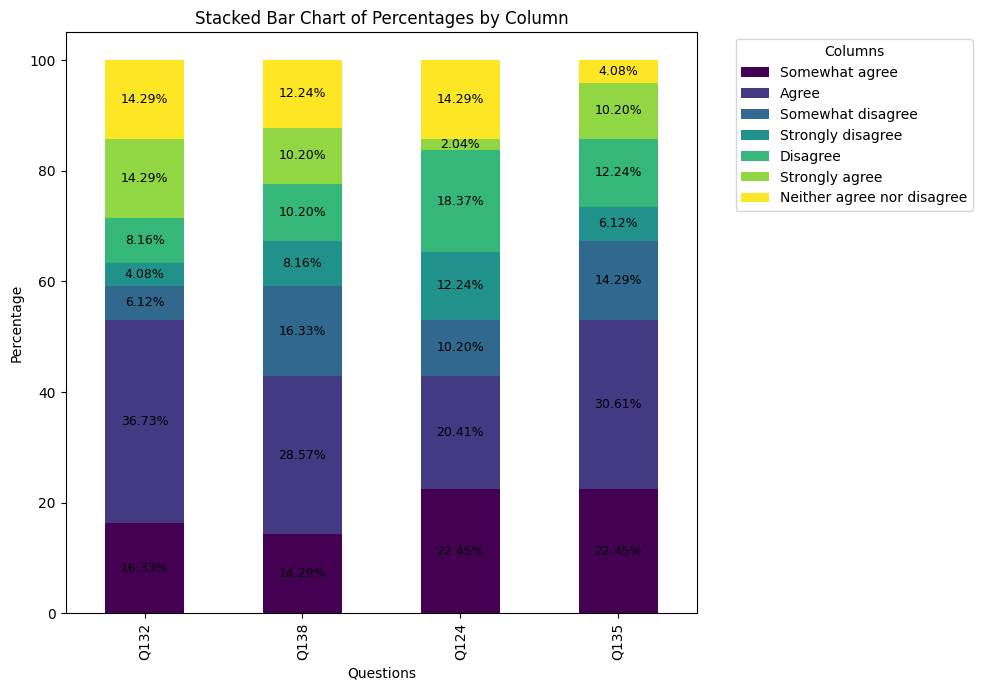

In [20]:
df4_percentage = df4.div(df4.sum(axis=1), axis=0) * 100

# Display the resulting DataFrame with percentages
print(df4_percentage)

ax = df4_percentage.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')


cumulative_sums = df4_percentage.cumsum(axis=1)
# Adding title and labels
plt.title('Stacked Bar Chart of Percentages by Column')
plt.xlabel('Questions')
plt.ylabel('Percentage')

for i in range(df4_percentage.shape[0]):
    for j in range(df4_percentage.shape[1]):
        value = df4_percentage.iloc[i, j]
        if value > 0:  # Only annotate if percentage is greater than 0
            ax.text(
                x=i,
                y=cumulative_sums.iloc[i, j] - value / 2,
                s=f'{value:.2f}%',
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )


# Displaying the legend
plt.legend(title='Columns', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

In [4]:
frq= data[['Q131', 'Q151']]
frq.head()
frq['Q131'].unique()

array(["If you needed help with a safety or privacy issue related to a child's experience with Roblox, where would you go to find help? \n\nExample issues include the following: \n- The child was scammed out of money on Roblox by another player. \n- The child has been seeing adult content on Roblox during game play",
       '{"ImportId":"QID131_TEXT"}', nan,
       'I would find the contact information for the game administrators',
       'Game settings ', 'I would report in game ', 'support',
       'Roblox customer service/something similar ',
       'Parental controls in settings',
       'I would look for the customer service phone number/text/email/chat',
       "I'm sure I  could find a way to report the player and talk to support about the problem. ",
       'There is a chat or help feature on the screen that you can click for help',
       'Reddit', 'Roblox Customer Support ',
       'I would contact the developers of Roblox. ',
       'Roblox customer service or whatever their

In [146]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords as nltk_stopwords

# stopwords = nltk_stopwords.words('english')
stopwords = stopwords.words("english")
# stopwords= stopwords.extend([NaN])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
question_131=frq['Q131'].tolist()
question_151=frq['Q151'].tolist()

In [148]:
print(question_131)

["If you needed help with a safety or privacy issue related to a child's experience with Roblox, where would you go to find help? \n\nExample issues include the following: \n- The child was scammed out of money on Roblox by another player. \n- The child has been seeing adult content on Roblox during game play", '{"ImportId":"QID131_TEXT"}', nan, 'I would find the contact information for the game administrators', 'Game settings ', 'I would report in game ', 'support', 'Roblox customer service/something similar ', 'Parental controls in settings', 'I would look for the customer service phone number/text/email/chat', "I'm sure I  could find a way to report the player and talk to support about the problem. ", 'There is a chat or help feature on the screen that you can click for help', nan, 'Reddit', 'Roblox Customer Support ', 'I would contact the developers of Roblox. ', 'Roblox customer service or whatever their equivalent is', 'creator of the game', 'Roblox Support', "I don't know", 'To 

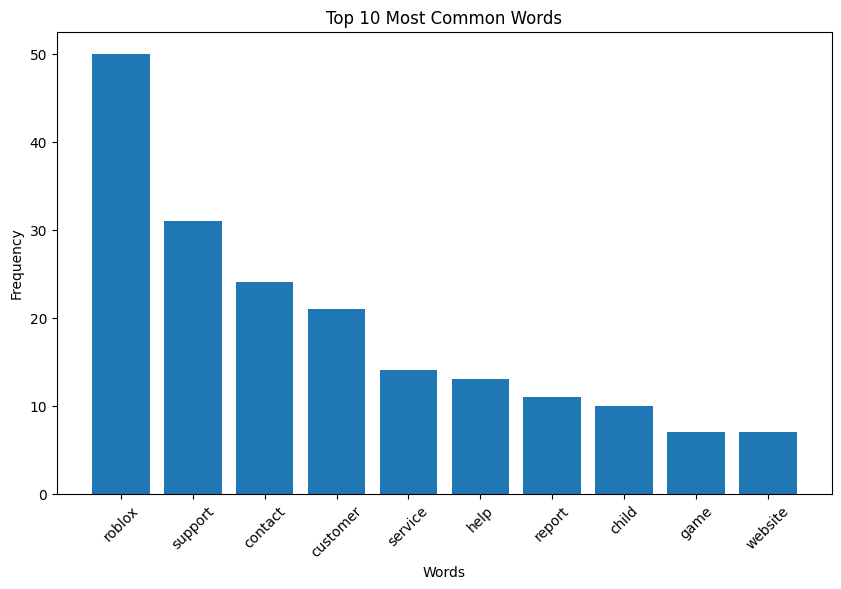

In [174]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Clean the list: remove None values and convert all elements to strings
cleaned_question_131 = [str(text) for text in question_131 if text is not None]

# Combine the list into a single string
combined_text = ' '.join(cleaned_question_131)

# Tokenize the combined text
tokens = word_tokenize(combined_text.lower())

# Remove stopwords and non-alphabetic tokens
stopwords_set =set(stopwords.words('english'))
custom_stopwords = {'NaN', 'nan', 'would', 'go'}

# Extend the default stopwords set with custom stopwords
stopwords_set.update(custom_stopwords)
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stopwords_set]

# Get the frequency distribution
word_freq = Counter(filtered_tokens)

# Get the 10 most common words
common_words = word_freq.most_common(10)

# Create the bar chart
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

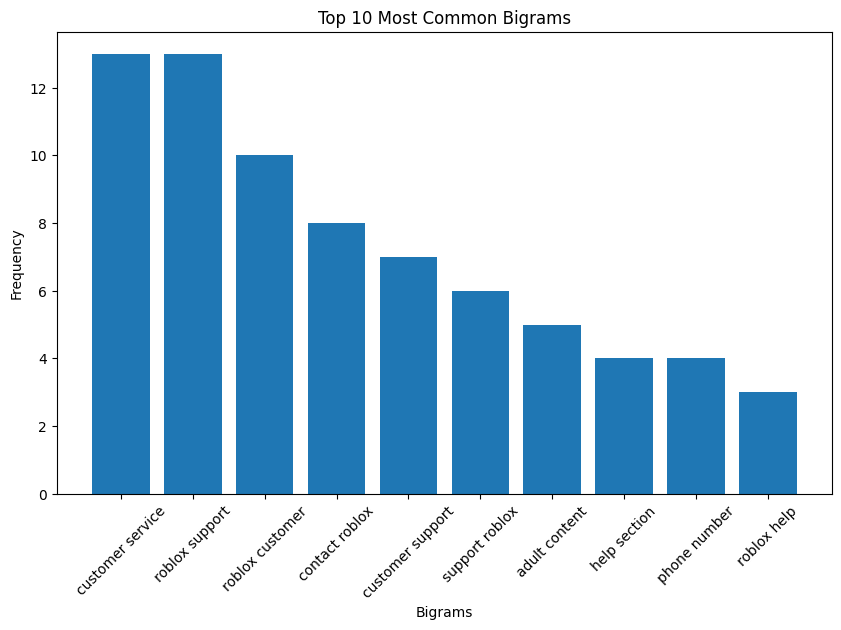

In [8]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import bigrams


# Clean the list: remove None values and convert all elements to strings
cleaned_question_131 = [str(text) for text in question_131 if text is not None]

# Combine the list into a single string
combined_text = ' '.join(cleaned_question_131)

# Tokenize the combined text
tokens = word_tokenize(combined_text.lower())

# Define the default stopwords set
stopwords_set = set(stopwords.words('english'))

# Define your custom stopwords
custom_stopwords = {'NaN', 'nan', 'would', 'go'}

# Extend the default stopwords set with custom stopwords
stopwords_set.update(custom_stopwords)

# Remove stopwords and non-alphabetic tokens
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stopwords_set]

# Generate bigrams from the filtered tokens
bigrams_list = list(bigrams(filtered_tokens))

# Filter out bigrams that contain any stopwords
filtered_bigrams = [bg for bg in bigrams_list if bg[0] not in stopwords_set and bg[1] not in stopwords_set]

# Get the frequency distribution of bigrams
bigram_freq = Counter(filtered_bigrams)

# Get the 10 most common bigrams
common_bigrams = bigram_freq.most_common(10)

# Prepare data for plotting
bigrams_words, bigram_counts = zip(*common_bigrams)
bigrams_words = [' '.join(pair) for pair in bigrams_words]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(bigrams_words, bigram_counts)
plt.title('Top 10 Most Common Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()